# Linear Regression on Wine Dataset.

We have the Wine Quality dataset from [UCI's Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). The goal is to model wine quality based on physicochemical tests.

In [10]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

In [11]:
path = '/content/gdrive/MyDrive/Datasets/UCI_Wine_Quality/'

In [12]:
col_name = ['class' , 'Alcohol' , 'Malic acid' , 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids'
            ,'Nonflavanoid phenols' , 'Proanthocyanins' , 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

df = pd.read_csv('wine.data', delimiter=',', names = col_name)

def pl(x):
  return x-1

df['class']=df['class'].apply(pl)


In [13]:
df.dtypes

class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [14]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [15]:
# Data to numpy arrays
X = df.iloc[:, :11].to_numpy().astype(np.float32)
y = df.iloc[:, 11].to_numpy()
X[:10], y[:10]

(array([[  0.  ,  14.23,   1.71,   2.43,  15.6 , 127.  ,   2.8 ,   3.06,
           0.28,   2.29,   5.64],
        [  0.  ,  13.2 ,   1.78,   2.14,  11.2 , 100.  ,   2.65,   2.76,
           0.26,   1.28,   4.38],
        [  0.  ,  13.16,   2.36,   2.67,  18.6 , 101.  ,   2.8 ,   3.24,
           0.3 ,   2.81,   5.68],
        [  0.  ,  14.37,   1.95,   2.5 ,  16.8 , 113.  ,   3.85,   3.49,
           0.24,   2.18,   7.8 ],
        [  0.  ,  13.24,   2.59,   2.87,  21.  , 118.  ,   2.8 ,   2.69,
           0.39,   1.82,   4.32],
        [  0.  ,  14.2 ,   1.76,   2.45,  15.2 , 112.  ,   3.27,   3.39,
           0.34,   1.97,   6.75],
        [  0.  ,  14.39,   1.87,   2.45,  14.6 ,  96.  ,   2.5 ,   2.52,
           0.3 ,   1.98,   5.25],
        [  0.  ,  14.06,   2.15,   2.61,  17.6 , 121.  ,   2.6 ,   2.51,
           0.31,   1.25,   5.05],
        [  0.  ,  14.83,   1.64,   2.17,  14.  ,  97.  ,   2.8 ,   2.98,
           0.29,   1.98,   5.2 ],
        [  0.  ,  13.86,   1.35,   2.

In [16]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Converting data to tensors.
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [19]:
X_train.shape, y_train.shape

(torch.Size([142, 11]), torch.Size([142]))

In [20]:
# Creating linear regression model
model = nn.Linear(11, 1)
model.state_dict()  # Shows model parameters

OrderedDict([('weight',
              tensor([[ 0.2686, -0.2546,  0.1257,  0.2276, -0.1208,  0.1739, -0.2143, -0.1636,
                       -0.1151, -0.1319,  0.1056]])),
             ('bias', tensor([0.2212]))])

In [21]:
# Setting up loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.7)

In [22]:
# Training
EPOCHS = 100
train_losses = []
test_losses = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model.train()

  # Forward Propagation
  y_pred = model(X_train).squeeze(dim=1)

  # Loss Value
  loss = loss_fn(y_pred, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test).squeeze(dim=1)
    test_loss = loss_fn(test_preds, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.3450709581375122 | Test Loss: 1.3432320356369019
Epoch: 10 | Train Loss: 0.278202086687088 | Test Loss: 0.21289321780204773
Epoch: 20 | Train Loss: 0.08868218213319778 | Test Loss: 0.06379958987236023
Epoch: 30 | Train Loss: 0.04679239168763161 | Test Loss: 0.03255326673388481
Epoch: 40 | Train Loss: 0.034950535744428635 | Test Loss: 0.024894636124372482
Epoch: 50 | Train Loss: 0.030003661289811134 | Test Loss: 0.022070787847042084
Epoch: 60 | Train Loss: 0.027225863188505173 | Test Loss: 0.02051793597638607
Epoch: 70 | Train Loss: 0.025446105748414993 | Test Loss: 0.019558941945433617
Epoch: 80 | Train Loss: 0.024249982088804245 | Test Loss: 0.01895391382277012
Epoch: 90 | Train Loss: 0.023431051522493362 | Test Loss: 0.018580781295895576


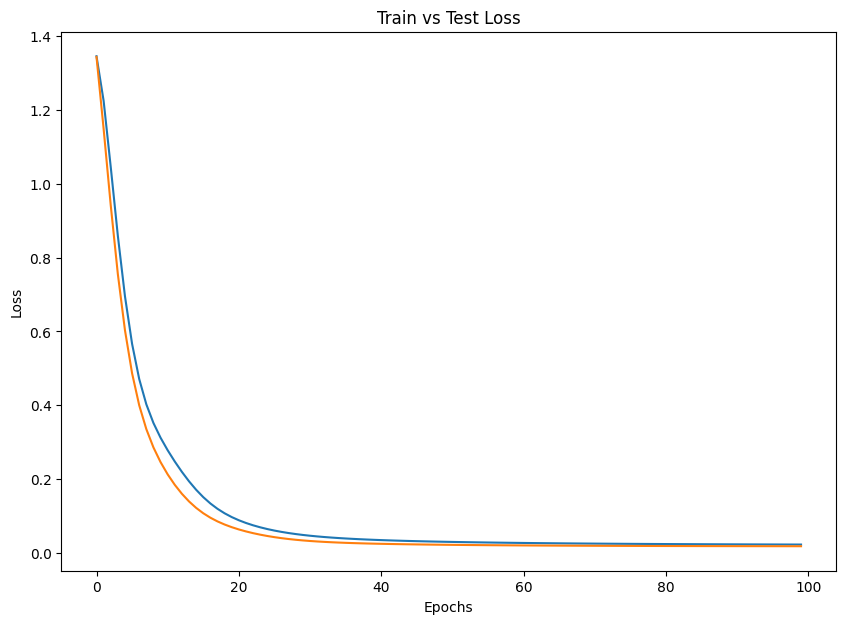

In [23]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

In [24]:
# Accuracy Function for evaluation.
def acc_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds.squeeze()).sum().item()
  acc = correct / len(y_preds)
  return acc*100

In [25]:
# Making predictions with our model
model.eval()
with torch.inference_mode():
  preds = model(X_test)
  preds = torch.round(preds)
print(f'Test Accuracy: {acc_fn(y_test, preds)}')

Test Accuracy: 0.0


# Multinomial Logistic Regression
Let's treat this as a classification problem and use multinomial logistic regression to take an attempt at getting a higher accuracy.

In [26]:
# Let's try multiclass logistic regression.
model2 = nn.Linear(11, 10)
model2.state_dict()

OrderedDict([('weight',
              tensor([[ 0.2867,  0.2299,  0.1179,  0.0103, -0.2073, -0.0887, -0.0071, -0.1352,
                       -0.0282,  0.2893, -0.1196],
                      [ 0.2352,  0.1072, -0.2946,  0.0384,  0.1405, -0.0258, -0.2294, -0.1570,
                       -0.1639,  0.2251, -0.2651],
                      [-0.1624, -0.1194,  0.0022, -0.0968,  0.0857,  0.2498,  0.1956,  0.1909,
                       -0.0547, -0.2830, -0.2745],
                      [-0.1263, -0.0579, -0.2095, -0.1824,  0.0661, -0.0861,  0.0690, -0.2304,
                        0.2076, -0.1499, -0.2000],
                      [ 0.1858,  0.1681,  0.1913,  0.2718, -0.0830,  0.2453,  0.2457, -0.0743,
                        0.2795,  0.2065,  0.2231],
                      [-0.1372,  0.2987,  0.2394, -0.0373,  0.1832, -0.1046,  0.1589, -0.0124,
                        0.2370,  0.1993,  0.2710],
                      [ 0.0673, -0.1128, -0.1746,  0.1695,  0.0024, -0.0606, -0.0962,  0.1265,
     

In [27]:
# Setting up our loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(),
                            lr=0.05,
                            momentum=0.9)

In [28]:
# Since Cross Entropy expects us to have long datatype as our targets, we have to change y_test, y_train
y_train = y_train.to(torch.long)
y_test = y_test.to(torch.long)

In [29]:
# Training
EPOCHS = 100
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model2.train()

  # Forward Propagation
  logits = model2(X_train)
  probs = torch.softmax(logits, dim=1)
  pred_labels = probs.argmax(dim=1)
  acc = acc_fn(y_train, pred_labels)
  train_acc.append(acc)

  # Loss Value
  loss = loss_fn(logits, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test)
    test_probs = torch.softmax(test_logits, dim=1)
    test_pred_labels = test_probs.argmax(dim=1)
    t_acc = acc_fn(y_test, test_pred_labels)
    train_acc.append(t_acc)

    test_loss = loss_fn(test_logits, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {t_acc:.2f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 2.31265, Train Acc: 4.93 | Test Loss: 2.25213, Test Acc: 5.56
Epoch: 10 | Train Loss: 1.06033, Train Acc: 78.17 | Test Loss: 1.21006, Test Acc: 69.44
Epoch: 20 | Train Loss: 0.76945, Train Acc: 80.99 | Test Loss: 0.91481, Test Acc: 72.22
Epoch: 30 | Train Loss: 0.52680, Train Acc: 81.69 | Test Loss: 0.56972, Test Acc: 80.56
Epoch: 40 | Train Loss: 0.48302, Train Acc: 79.58 | Test Loss: 0.50860, Test Acc: 83.33
Epoch: 50 | Train Loss: 0.44493, Train Acc: 78.87 | Test Loss: 0.52546, Test Acc: 80.56
Epoch: 60 | Train Loss: 0.43031, Train Acc: 80.99 | Test Loss: 0.54011, Test Acc: 77.78
Epoch: 70 | Train Loss: 0.42338, Train Acc: 82.39 | Test Loss: 0.54535, Test Acc: 75.00
Epoch: 80 | Train Loss: 0.41792, Train Acc: 79.58 | Test Loss: 0.54469, Test Acc: 75.00
Epoch: 90 | Train Loss: 0.41439, Train Acc: 79.58 | Test Loss: 0.54598, Test Acc: 75.00


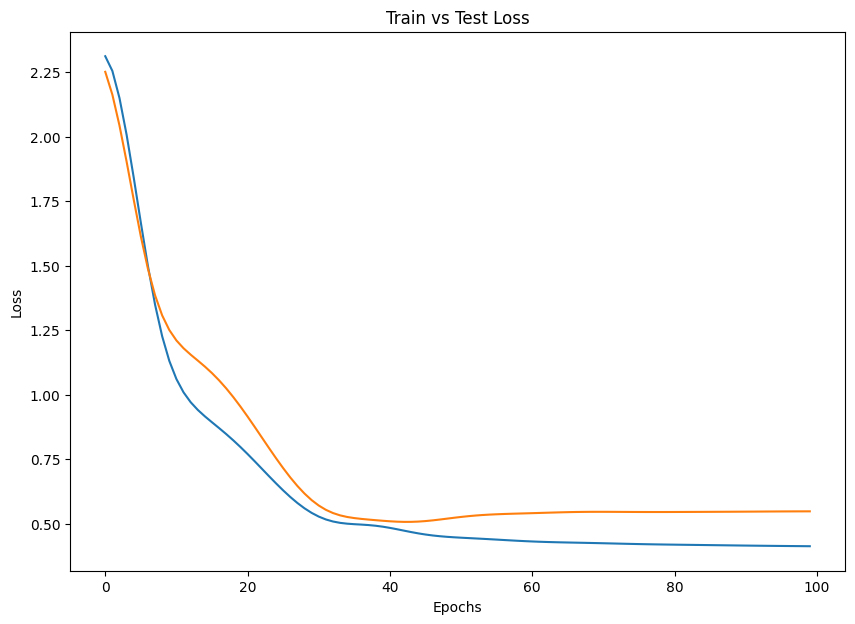

In [30]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

Both the algorithms show mediocre performance on this dataset. I should try implementing Random Forests or XGBoost and compare performances.